# LetsGrowMore LGMVIP internship Task 2 

## Prediction using Decision Tree  Algorithm 

- Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  


- Author :- Bhushan Asati

## importing library

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

## Loading Data set

In [47]:
# Load the iris dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Dataset Info

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Finding Null Values

In [49]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0    False          False         False          False         False    False
1    False          False         False          False         False    False
2    False          False         False          False         False    False
3    False          False         False          False         False    False
4    False          False         False          False         False    False
..     ...            ...           ...            ...           ...      ...
145  False          False         False          False         False    False
146  False          False         False          False         False    False
147  False          False         False          False         False    False
148  False          False         False          False         False    False
149  False          False         False          False         False    False

[

## Drop Id Columns

In [50]:
df = df.drop(columns= ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### - Describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

- The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [51]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
df.shape

(150, 5)

In [53]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:>

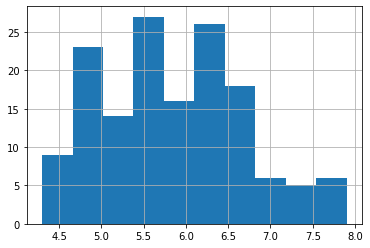

In [54]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

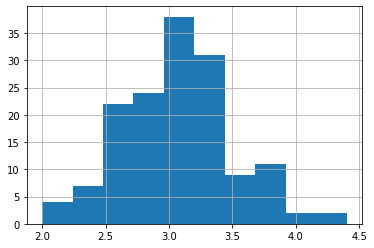

In [55]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

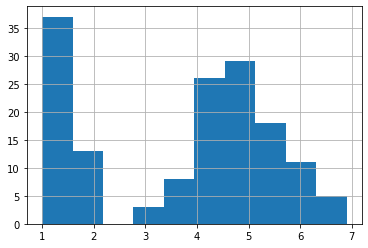

In [56]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

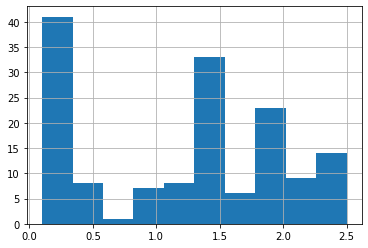

In [57]:
df['PetalWidthCm'].hist()

In [58]:
# Scatterplot 
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

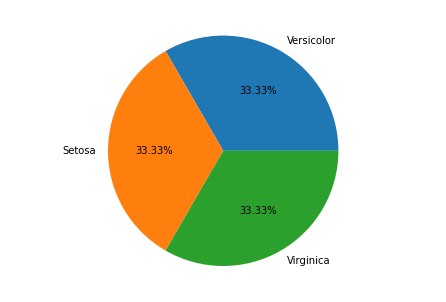

In [59]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

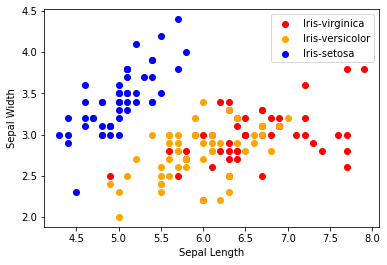

In [60]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

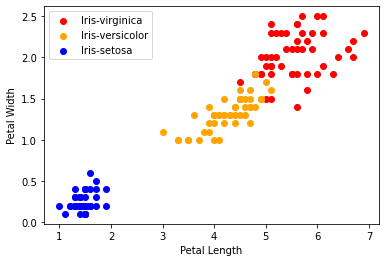

In [61]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

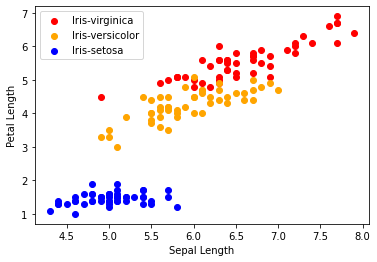

In [62]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

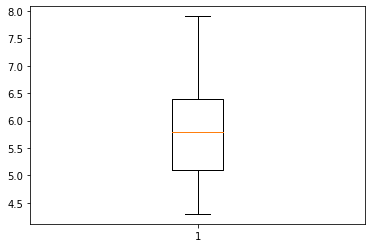

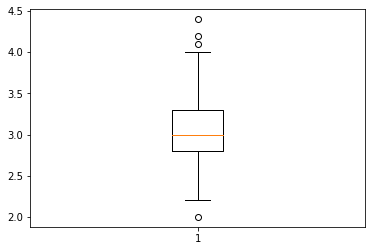

In [63]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([df['SepalLengthCm']])
plt.figure(2)
plt.boxplot([df['SepalWidthCm']])
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

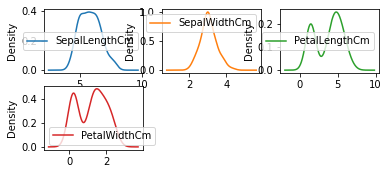

In [64]:
df.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

SepalLengthCm       AxesSubplot(0.125,0.536818;0.133621x0.343182)
SepalWidthCm     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
PetalLengthCm     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
PetalWidthCm     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
dtype: object

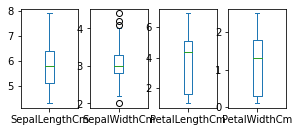

In [65]:
df.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

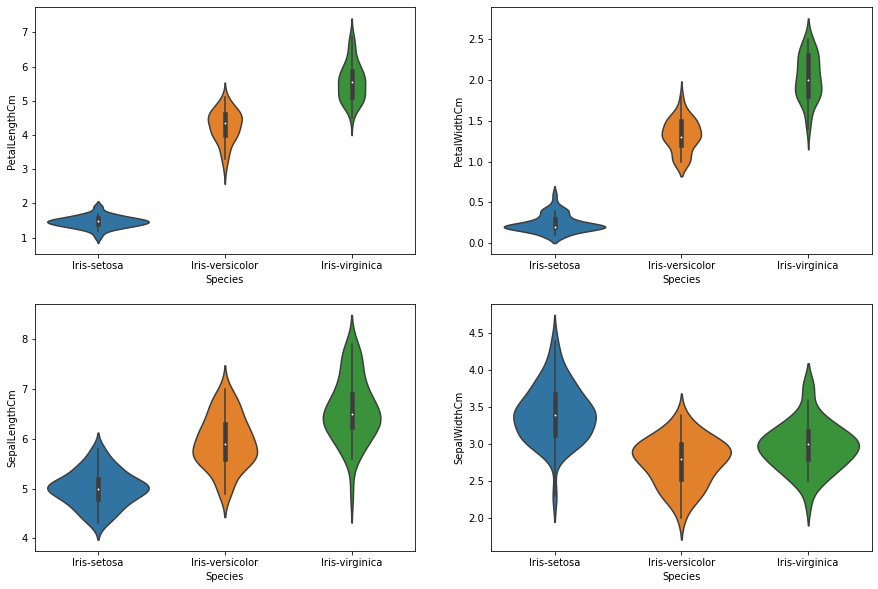

In [66]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

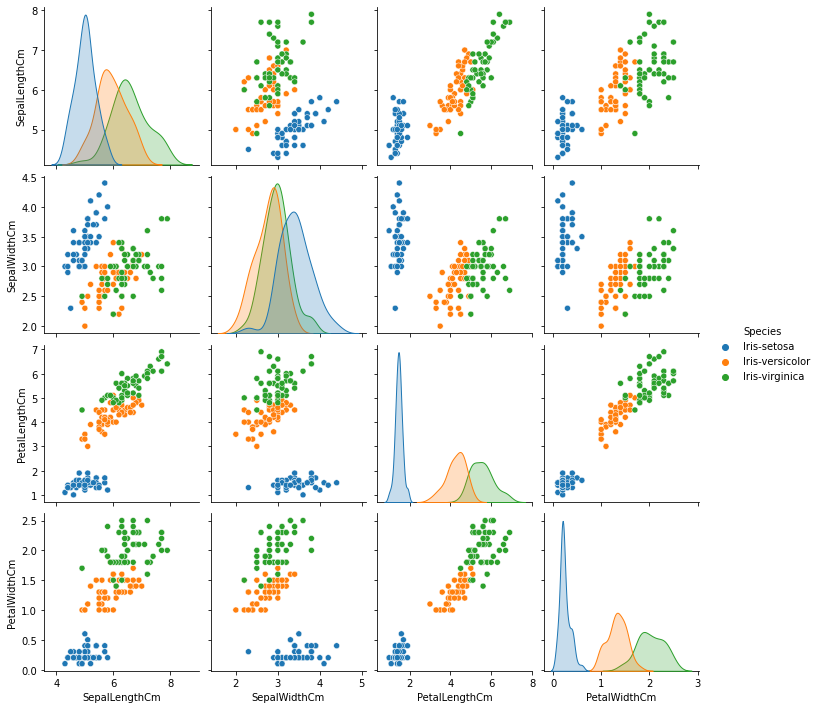

In [67]:
sns.pairplot(df,hue='Species');

In [68]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

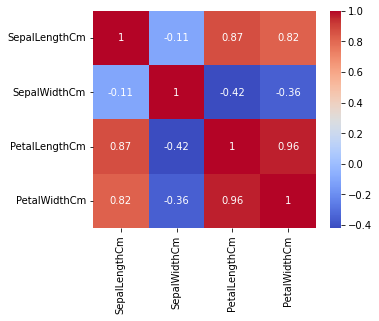

In [69]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [71]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [72]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [ ]:
#Model Building Decision Tree Model

In [73]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)

In [74]:
clf

DecisionTreeClassifier()

In [75]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [76]:
y_pred

array([1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0,
       2, 2, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 2, 1,
       0])

In [77]:
y_test

73     1
124    2
61     1
109    2
147    2
21     0
37     0
137    2
149    2
99     1
76     1
112    2
95     1
106    2
107    2
68     1
32     0
113    2
81     1
10     0
80     1
29     0
130    2
122    2
75     1
100    2
148    2
14     0
13     0
0      0
133    2
79     1
140    2
123    2
132    2
64     1
53     1
50     1
96     1
41     0
33     0
51     1
146    2
86     1
45     0
Name: Species, dtype: int64

In [78]:
data_frame = pd.DataFrame({"Actual Data" :y_test, "Predicted Data":y_pred})

In [79]:
data_frame.head()

,Actual Data,Predicted Data
73,1,1
124,2,2
61,1,1
109,2,2
147,2,2


In [80]:
data_frame.tail()

,Actual Data,Predicted Data
33,0,0
51,1,1
146,2,2
86,1,1
45,0,0


# Accuracy of the model

In [85]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


# Visualizing the Decision Tree

In [82]:
col_names = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
target_names = ["Setosa", "Versicolor", "Virginica"]

[Text(167.40000000000003, 199.32, 'Petal width <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [39, 34, 32]\nclass = Setosa'),
 Text(133.92000000000002, 163.07999999999998, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Setosa'),
 Text(200.88000000000002, 163.07999999999998, 'Petal width <= 1.75\ngini = 0.5\nsamples = 66\nvalue = [0, 34, 32]\nclass = Versicolor'),
 Text(133.92000000000002, 126.83999999999999, 'Petal length <= 5.35\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = Versicolor'),
 Text(100.44000000000001, 90.6, 'Sepal width <= 2.25\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = Versicolor'),
 Text(66.96000000000001, 54.359999999999985, 'Petal length <= 4.5\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]\nclass = Versicolor'),
 Text(33.480000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Versicolor'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text

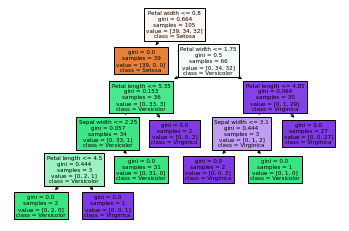

In [83]:
plot_tree(clf, feature_names=col_names, class_names=target_names, filled=True)

In [86]:
model = DecisionTreeClassifier().fit(X,Y)

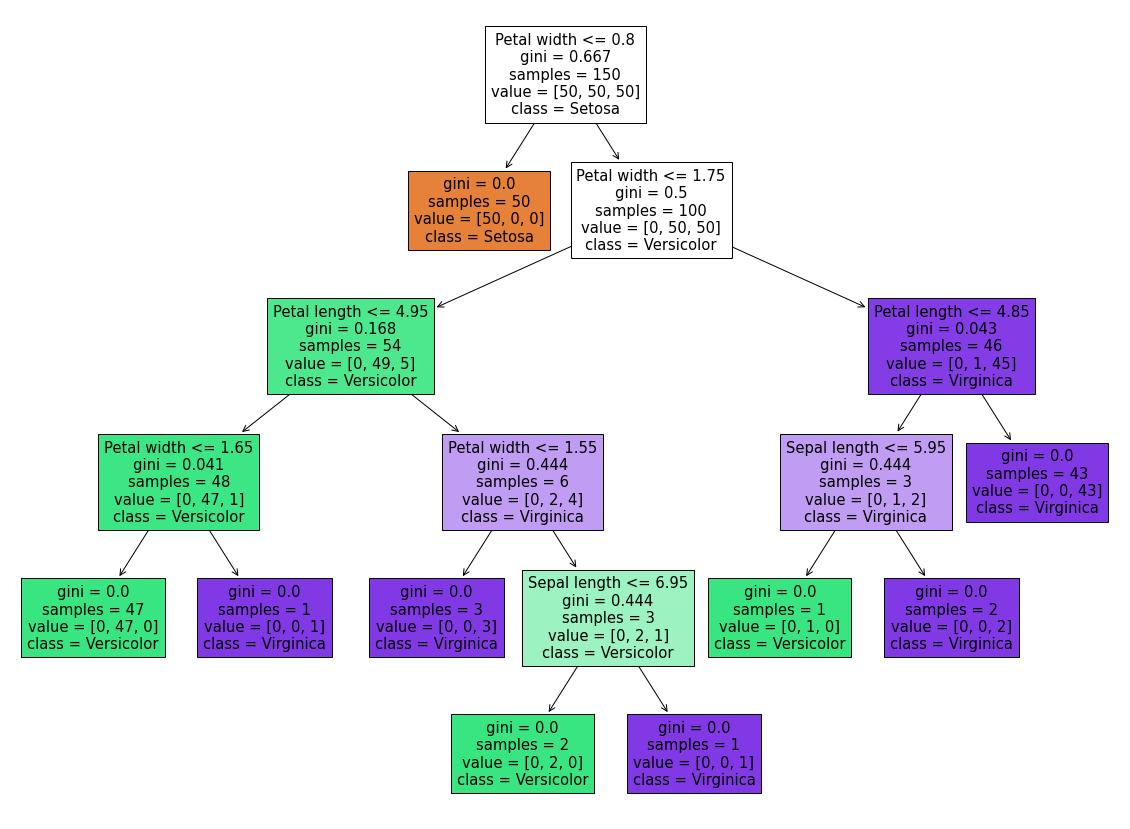

In [87]:
plt.figure(figsize=(20,15))
tree = tree.plot_tree(model, feature_names=col_names, class_names=target_names, filled=True)